# Approximating using the CompEcon toolbox

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp00.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## Initial tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev,nodeunif
from matplotlib import cm

<hr>

## Univariate approximation

Approximating the function $f(x) = e^{-2x}$. Its derivative is $f'(x) = -2e^{-2x}$

In [2]:
f1 = lambda x: np.exp(-2 * x)
d1 = lambda x: -2 * np.exp(-2 * x)

### Fit approximant

The CompEcon toolbox defines the ```BasisChebyshev``` class for Chebyshev interpolation. Its positional arguments are `n` (number of nodes), `a` (lower bound) and `b` (upper bound). The optional keyword argument `f` indicates a function (the lambda `f1` in our example) to be approximated.

In [3]:
n, a, b = 10, -1, 1
f1fit = BasisChebyshev(n, a, b, f=f1)

Here, `f1fit` is an instance of the `BasisChebyshev` class. Once a function is specified (as with the keyword argument `f` above), it can be evaluated at a given vector `x` by *calling* `f1fit`  as any other function
```
f1fit(x)  # returns a vector containing the interpolation of each element of x
f1fit()   # without arguments, it evaluates the function at the basis nodes
```

When a function is specified with the option `f`, the `BasisChebyshev` object computes the interpolation coefficients $c = \Phi(x)^{-1}f(x)$, where $x$ represent the nodes of bhe basis.  Alternatively, if the values `fx` of the function at the nodes are available (instead of the function itself, as is usually the case), then the basis is created by:
```
BasisChebyshev(n, a, b, y=fx)
```

### Graph approximation error for function and derivative

To evaluate the precission of the interpolation, we compare the the fitted function `f1fit` to the true values `f1` over a grid of 1001 points. We do the same for the derivative function.

In the figures, the red dots represent the 10 interpolation nodes (where residuals equal zero, by construction). These are returned by the `.nodes` attribute of the basis.

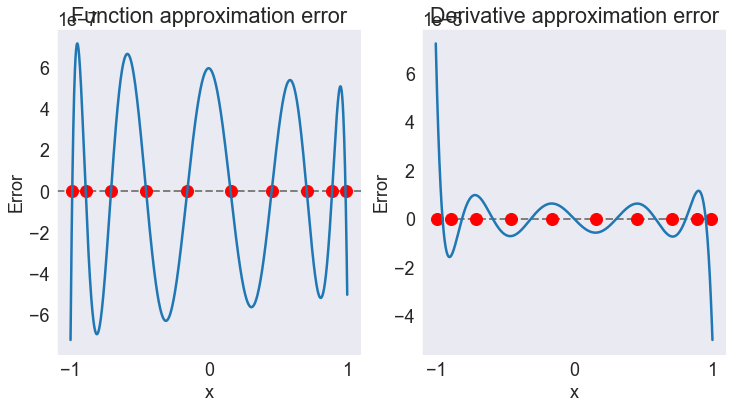

In [4]:
axopts = {'xlabel': 'x', 'ylabel': 'Error', 'xticks': [-1, 0, 1]}
x = np.linspace(a, b, 1001)
fig = plt.figure(figsize=[12, 6])

ax1 = fig.add_subplot(121, title='Function approximation error', **axopts)
ax1.axhline(linestyle='--', color='gray', linewidth=2)
ax1.plot(f1fit.nodes, np.zeros_like(f1fit.nodes), 'ro', markersize=12)
ax1.plot(x, f1fit(x) - f1(x))

ax2 = fig.add_subplot(122, title='Derivative approximation error', **axopts)
ax2.plot(x, np.zeros_like(x), '--', color='gray', linewidth=2)
ax2.plot(f1fit.nodes, np.zeros_like(f1fit.nodes), 'ro', markersize=12)
ax2.plot(x, f1fit(x, 1) - d1(x))

<hr>

## Bivariate Interpolation

Approximating the function $f(x_1, x_2) = \dfrac{\cos(x_1)}{e^{x_2}}$. 

In [5]:
f2 = lambda x: np.cos(x[0]) / np.exp(x[1])

### Set degree and domain interpolation

The ```BasisChebyshev``` class can also interpolate *d*-dimensional functions. If one of the positional arguments is a scalar (like the bounds below), it is assumed that the same value holds in every dimension.

In [6]:
n, a, b = 7, 0.0, 1.0
f2fit = BasisChebyshev([n, n], a, b, f=f2)

By default, multidimensional interpolation is done by taking the tensor product of each dimension. Other options are available with the keyword `method`, as in:
```
BasisChebyshev(n, a, b, method='smolyak', qn=3, qp= 3) # for Smolyak interpolation
BasisChebyshev(n, a, b, method='complete', qp=2)       # for complete polynomials
BasisChebyshev(n, a, b, method='tensor')               # tensor product (default)
```

Notice that Smolyak and complete polynomials interpolation require the setting of keywords `qn` and `qp`, to control node and polynomial selection, respectively.

### Nice plot of function approximation error

Now evaluate the residuals over a 101 by 101 grid.

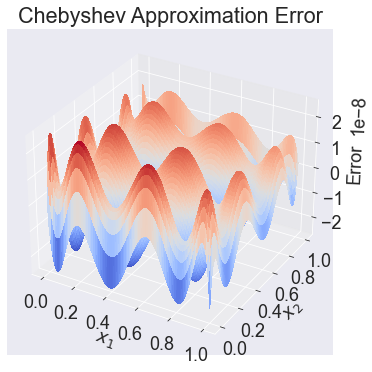

In [7]:
nplot = [101, 101]
x = nodeunif(nplot, a, b)
x1, x2 = x
error = f2fit(x) - f2(x)
error.shape = nplot
x1.shape = nplot
x2.shape = nplot

fig = plt.figure(figsize=[15, 6])
ax = fig.gca(projection='3d', title='Chebyshev Approximation Error',
             xlabel='$x_1$', ylabel='$x_2$', zlabel='Error')
ax.plot_surface(x1, x2, error, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

### Compute partial derivatives

Partial derivatives can be computed by *calling* a `BasisChebyshev` object, indicating the order of derivatives by a second argument `order`, as in
```
f2fit(x, order)
```

Notice that unlike the MATLAB version of CompEcon, in this Python version the first index of `x` indicates the dimension, while the last index indicates an "observation" (evaluation point). Something similar applies to the `order` parameter: `order[i, j]` indicates the order of differentiation with respect to `i` in evaluation `j`.

In [8]:
x = np.array([[0.5], [0.5]])
order = [[1, 0, 2, 1, 0],
         [0, 1, 0, 1, 2]]

ff = f2fit(x, order)

print(('x   = [0.5, 0.5]\n' + 
       'f1  = {:7.4f}\n' + 
       'f2  = {:7.4f}\n' + 
       'f11 = {:7.4f}\n' +
       'f12 = {:7.4f}\n' +
       'f22 = {:7.4f}').format(*ff))

x   = [0.5, 0.5]
f1  = -0.2908
f2  = -0.5323
f11 = -0.5323
f12 =  0.2908
f22 =  0.5323
